# Quantiative neighborhood measurements
In this notebook we demonstrate how to quantify relationships between neighboring cells. We use the neighbor count to remove objects from a label image that are no cells. Afterwards we will measure and visualize the size of cells and the average size of cells in a given neighborhood.

In [1]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imread
import pandas as pd

The example image [maize_clsm.tif](https://github.com/dlegland/mathematical_morphology_with_MorphoLibJ/blob/master/sampleImages/maize_clsm.tif) was shared by David Legland and is licensed under [CC-BY 4.0 license](https://github.com/dlegland/mathematical_morphology_with_MorphoLibJ/blob/master/LICENSE).

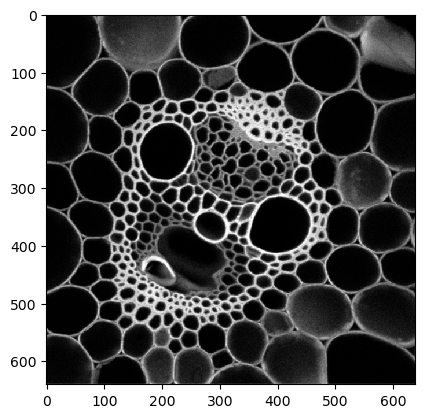

In [2]:
intensity_image = imread('../../data/maize_clsm.tif')
cle.imshow(intensity_image)

# Starting point: Label map
We use a basic segmentation algorithm to segment the dark objects in the image, hoping these are mostly cells.

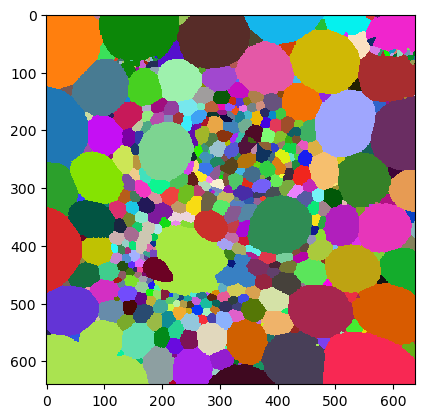

In [3]:
binary = cle.binary_not(cle.threshold_otsu(intensity_image))
objects = cle.voronoi_labeling(binary)

cle.imshow(objects, labels=True)

## Number of touching neighbor map
Next, we visualize the number of neighbors in colour.

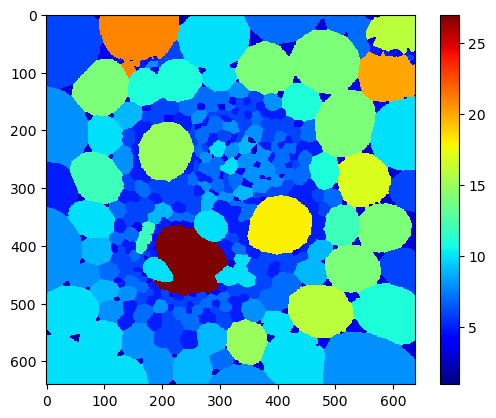

In [4]:
num_neighbors_map = cle.touching_neighbor_count_map(objects)

cle.imshow(num_neighbors_map, 
           colormap='jet', 
           colorbar=True)

By specifying minimum and maximum display intensity, we can see that most triangular objects, that are presumably no cells, have about 3 neighbors only.

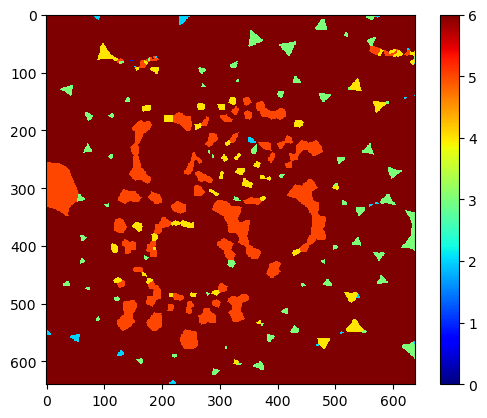

In [5]:
cle.imshow(num_neighbors_map, 
           min_display_intensity=0, 
           max_display_intensity=6, 
           colormap='jet', 
           colorbar=True)

## Filtering labels according to measurements
We can now exclude objects that have < 4 neighbors.

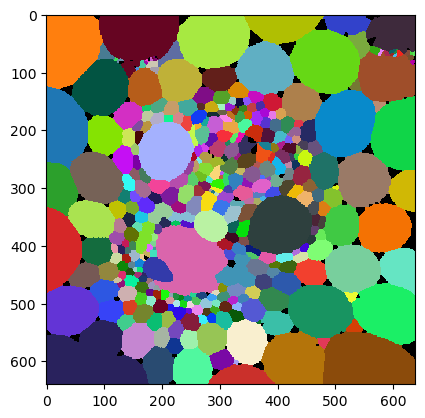

In [6]:
cells = cle.exclude_labels_with_map_values_out_of_range(num_neighbors_map, objects, minimum_value_range=4)

cle.imshow(cells, labels=True)

## Averaging values over a defined neighborhood
Now, with a cleaned result, we can measure properties of cells. Note: It would be scientifically questionable to count the number of neighbors now as we used this measurement for filtering the objects.

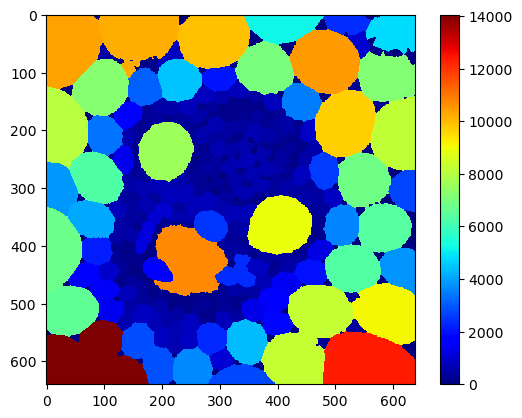

In [7]:
area_map = cle.pixel_count_map(cells)
cle.imshow(area_map, 
           colormap='jet', 
           colorbar=True)

For visualization purposes, we now produce a map that shows the average size and the maximum among neighbors for each cell.

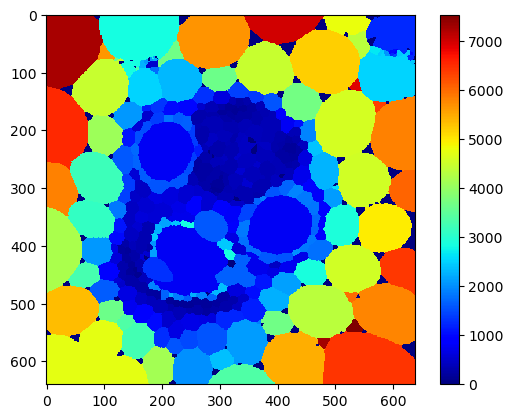

In [8]:
local_mean_area_map = cle.mean_of_touching_neighbors_map(area_map, cells)
cle.imshow(local_mean_area_map, 
           colormap='jet', 
           colorbar=True)

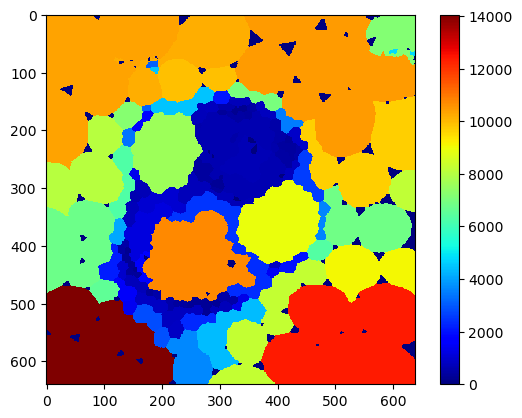

In [9]:
local_max_area_map = cle.maximum_of_touching_neighbors_map(area_map, cells)
cle.imshow(local_max_area_map, 
           colormap='jet', 
           colorbar=True)

## Tabular neighborhood analysis
These and similar measurments can also be derived in tabular form.

In [10]:
statistics = cle.statistics_of_labelled_neighbors(cells)

pd.DataFrame(statistics)

,label,touching_neighbor_count,minimum_distance_of_touching_neighbors,average_distance_of_touching_neighbors,maximum_distance_of_touching_neighbors,max_min_distance_ratio_of_touching_neighbors,proximal_neighbor_count_d10,proximal_neighbor_count_d20,proximal_neighbor_count_d40,proximal_neighbor_count_d80,...,touching_neighbor_count_dilated_r_10,minimum_distance_of_touching_neighbors_dilated_r_10,average_distance_of_touching_neighbors_dilated_r_10,maximum_distance_of_touching_neighbors_dilated_r_10,max_min_distance_ratio_of_touching_neighbors_dilated_r_10,touch_count_sum_dilated_r_10,minimum_touch_count_dilated_r_10,maximum_touch_count_dilated_r_10,minimum_touch_portion_dilated_r_10,maximum_touch_portion_dilated_r_10
0,1,4.0,60.320210,101.840363,139.683594,2.315701,0.0,0.0,0.0,1.0,...,4.0,60.131992,101.611427,138.916809,2.310198,251.0,40.0,99.0,0.159363,0.394422
1,2,5.0,70.345596,102.279503,139.683594,1.985676,0.0,0.0,0.0,1.0,...,5.0,69.458466,101.834366,138.916809,1.999998,313.0,47.0,81.0,0.150160,0.258786
2,3,4.0,66.247681,88.231575,105.587234,1.593825,0.0,0.0,0.0,2.0,...,4.0,65.842422,88.179047,105.653221,1.604638,231.0,54.0,67.0,0.233766,0.290043
3,4,5.0,62.034245,82.326614,107.360519,1.730665,0.0,0.0,0.0,3.0,...,5.0,61.471870,82.060867,107.331879,1.746032,283.0,46.0,66.0,0.162544,0.233216
4,5,5.0,65.249962,80.454788,107.360519,1.645373,0.0,0.0,0.0,3.0,...,5.0,65.238731,80.336967,107.331879,1.645217,309.0,32.0,132.0,0.103560,0.427184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,4.0,6.401806,28.644737,55.443081,8.660537,2.0,5.0,10.0,14.0,...,4.0,6.355856,29.127771,55.813652,8.781452,46.0,6.0,25.0,0.130435,0.543478
370,371,5.0,7.438875,17.765903,53.682270,7.216450,4.0,4.0,9.0,14.0,...,5.0,7.462044,17.792099,54.364231,7.285434,50.0,5.0,16.0,0.100000,0.320000
371,372,4.0,5.430400,16.685814,47.472179,8.741931,3.0,4.0,9.0,14.0,...,4.0,5.702640,17.013132,48.531986,8.510442,26.0,5.0,8.0,0.192308,0.307692
372,373,2.0,8.850188,30.322327,51.794464,5.852357,1.0,4.0,9.0,14.0,...,2.0,8.285303,30.604389,52.923477,6.387633,36.0,16.0,20.0,0.444444,0.555556
